**DESCARGA DE DATOS**

In [1]:
import math
import numpy as np

In [2]:
# Let's download the dataset
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&q=Madrid&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B"

--2022-01-30 18:25:23--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&q=Madrid&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [       <=>          ]  57.69M  3.06MB/s    in 20s     

2022-01-30 18:25:44 (2.86 MB/s) - ‘airbnb-listings.csv’ saved [60495800]



In [3]:
# Checking what we downloaded
!ls -ll

total 974156
-rw-r--r-- 1 root root  60495800 Jan 30 18:25 airbnb-listings.csv
drwx------ 5 root root      4096 Jan 30 17:28 drive
-rw-r--r-- 1 root root 926941184 Jan 30 17:11 images_2.npy
-rw-r--r-- 1 root root  10081520 Jan 30 16:29 model_Airbnb.h5
drwxr-xr-x 1 root root      4096 Jan  7 14:33 sample_data


In [4]:
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(10)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,14712301,https://www.airbnb.com/rooms/14712301,20170304065726,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,Located 1 minute away from Earls Court. It is ...,NaN,Located 1 minute away from Earls Court. It is ...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,7232618,https://www.airbnb.com/users/show/7232618,Iñigo,2013-07-02,"Madrid, Community of Madrid, Spain","Spanish, I love sports.",within a few hours,100.0,NaN,https://a0.muscache.com/im/users/7232618/profi...,https://a0.muscache.com/im/users/7232618/profi...,NaN,1.0,1.0,"email,phone,reviews,jumio,government_id","Bramham Gardens, London, England SW5 0HG, Unit...",NaN,Kensington and Chelsea,NaN,London,England,...,1,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",NaN,50.0,NaN,NaN,100.0,30.0,1,20,5,49,3 months ago,NaN,3,16,16,169,2017-03-04,2,2016-09-09,2016-09-29,90.0,10.0,10.0,9.0,9.0,9.0,10.0,NaN,NaN,strict,1.0,0.34,"51.492474020220754,-0.18862840099442768","Host Has Profile Pic,Host Identity Verified"
1,12884849,https://www.airbnb.com/rooms/12884849,20170304065726,2017-03-05,Five bedroom house in Barnes,Lovely and spacious Edwardian house located on...,The house is spacious with approx 225 sq. of l...,Lovely and spacious Edwardian house located on...,none,Quiet residential street,NaN,The house is located three minutes walk from t...,"Guests will have access to all rooms, as desir...",We will be away but will make ourselves availa...,NaN,https://a0.muscache.com/im/pictures/9b3adacb-1...,https://a0.muscache.com/im/pictures/9b3adacb-1...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/9b3adacb-1...,19959228,https://www.airbnb.com/users/show/19959228,Susanna,2014-08-13,GB,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/76a0b9a0-9...,https://a0.muscache.com/im/pictures/76a0b9a0-9...,Westbourne Green,2.0,2.0,"email,phone,reviews","Madrid Road, London, SW13 9PG, United Kingdom",LB of Richmond upon Thames,Richmond upon Thames,NaN,London,NaN,...,8,2.5,5.0,5.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Family/ki...",NaN,175.0,NaN,NaN,750.0,100.0,6,25,1,1125,8 months ago,NaN,0,0,0,0,2017-03-05,6,2016-07-11,2016-08-07,87.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.76,"51.482004616612734,-0.23927746504041247","Host Has Profile Pic,Is Location Exact"
2,17524980,https://www.airbnb.com/rooms/17524980,20170304065726,2017-03-05,"Modern & Bright, Central Soho, 1 Bedroom Apart...",A nice compact one bedroom apartment that has ...,One Bedroom Apartment - Bedroom (Double Bed 14...,A nice compact one bedroom apartment that has ...,none,"Central Soho. Oxford Street, Berwick Street, C...",- Central Location - Some Street Noise To Be e...,NaN,Whole Apartment Private Space,NaN,- Only 2 People Aloud Inside,https

**NOS QUEDAMOS SOLO CON MADRID**

In [5]:
df_Madrid = data[data['City'] == 'Madrid']

In [6]:
df_Madrid.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

**NOS QUEDAMOS CON LAS COLUMNAS QUE CONSIDERAMOS RELEVANTES**

In [23]:
features = ['Price', 'Thumbnail Url','Weekly Price','Monthly Price',
        'Zipcode', 'Neighbourhood',
        'Latitude', 'Longitude','Guests Included',
        'Minimum Nights', 'Maximum Nights',
        'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
        'Beds', 'Bed Type','Cleaning Fee',
        'Review Scores Rating']

df_Madrid = df_Madrid[features]
df_Madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,8753.0,69.133151,55.661774,9.000000,35.000000,58.000000,85.000000,850.000000
Weekly Price,8753.0,372.911481,104.157438,70.000000,368.633025,368.633025,368.633025,995.000000
Monthly Price,8753.0,1364.052158,555.158465,250.000000,1347.122812,1347.122812,1347.122812,25000.000000
Latitude,8753.0,40.420676,0.019037,40.332908,40.410580,40.418644,40.427425,40.511377
Longitude,8753.0,-3.697382,0.022297,-3.835498,-3.707643,-3.701605,-3.694252,-3.573613
Guests Included,8753.0,1.641837,1.131149,1.000000,1.000000,1.000000,2.000000,16.000000
Minimum Nights,8753.0,3.178682,14.365919,1.000000,1.000000,2.000000,3.000000,1125.000000
Maximum Nights,8753.0,982.727522,10856.106389,1.000000,360.000000,1125.000000,1125.000000,1000000.000000
Accommodates,8753.0,3.327659,2.012480,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,8753.0,1.273335,0.623998,0.000000,1.000000,1.000000,1.000000,8.000000


In [24]:
df_Madrid["Bathrooms"].fillna(df_Madrid["Bathrooms"].mode()[0], inplace=True)
df_Madrid['Bedrooms'].fillna(df_Madrid['Bedrooms'].mode()[0], inplace=True)
df_Madrid['Beds'].fillna(df_Madrid['Beds'].mode()[0], inplace=True)
df_Madrid['Cleaning Fee'].fillna(0, inplace=True)
df_Madrid['Price'].fillna(df_Madrid['Price'].mean(), inplace=True)

df_Madrid['Weekly Price'].fillna(df_Madrid['Weekly Price'].mean(), inplace=True)
df_Madrid['Monthly Price'].fillna(df_Madrid['Monthly Price'].mean(), inplace=True)

df_Madrid['Review Scores Rating'].fillna(df_Madrid['Review Scores Rating'].mode()[0], inplace=True)

In [25]:
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: '28004' if x == 'Madrid 28004' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: '28015' if x == '2815' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: '28015' if x == '2015' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: '28051' if x == '28051\n28051' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: '28002' if x == '28002\n28002' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: '28004' if x == '2804' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: '28005' if x == '2805' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: '28013' if x == '280013' else x)

df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: math.nan if x == '20013' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: math.nan if x == '27013' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: math.nan if x == '20126' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: math.nan if x == '27004' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: math.nan if x == '25008' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: math.nan if x == '28' else x)
df_Madrid['Zipcode'] = df_Madrid['Zipcode'].apply(lambda x: math.nan if x == '-' else x)
df_Madrid['Zipcode'].fillna(df_Madrid['Zipcode'].mode()[0], inplace=True)

In [26]:
df_Madrid = df_Madrid.drop(df_Madrid[df_Madrid['Neighbourhood'].isnull()].index)

In [27]:
'''
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()

#df_Madrid['Zipcode'] = le1.fit_transform(df_Madrid['Zipcode'])
df_Madrid['Neighbourhood'] = le2.fit_transform(df_Madrid['Neighbourhood'])
df_Madrid['Property Type'] = le3.fit_transform(df_Madrid['Property Type'])
df_Madrid['Room Type'] = le4.fit_transform(df_Madrid['Room Type'])
df_Madrid['Bed Type'] = le5.fit_transform(df_Madrid['Bed Type'])
'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\nle1 = LabelEncoder()\nle2 = LabelEncoder()\nle3 = LabelEncoder()\nle4 = LabelEncoder()\nle5 = LabelEncoder()\n\n#df_Madrid['Zipcode'] = le1.fit_transform(df_Madrid['Zipcode'])\ndf_Madrid['Neighbourhood'] = le2.fit_transform(df_Madrid['Neighbourhood'])\ndf_Madrid['Property Type'] = le3.fit_transform(df_Madrid['Property Type'])\ndf_Madrid['Room Type'] = le4.fit_transform(df_Madrid['Room Type'])\ndf_Madrid['Bed Type'] = le5.fit_transform(df_Madrid['Bed Type'])\n"

In [28]:
df_Madrid.dtypes

Price                   float64
Thumbnail Url            object
Weekly Price            float64
Monthly Price           float64
Zipcode                  object
Neighbourhood            object
Latitude                float64
Longitude               float64
Guests Included           int64
Minimum Nights            int64
Maximum Nights            int64
Property Type            object
Room Type                object
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Bed Type                 object
Cleaning Fee            float64
Review Scores Rating    float64
dtype: object

**BUSCAMOS LAS IMAGENES DISPONIBLES DE NUESTRO DF**

In [29]:
# Let's create a list with image url and index
images_paths = []
for i, img_url in enumerate(df_Madrid['Thumbnail Url']):
  images_paths.append([i, img_url])

In [30]:
import imageio as io
import cv2
from numpy import moveaxis
import PIL.Image

# This function downloads the images and returns them with the index where to save them

def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)

        # If channels info is in first place, move to last position
        if (img.shape[0] < img.shape[1] ) and (img.shape[0] < img.shape[2]):
          img = moveaxis(img, 0, 2)

        # In case any image is RGBA, take onloy RGB channels
        img = img[...,:3]

        # Some images may be in black & white. I convert to to RGB as otherwise it generates error
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
        
    except IOError as err:
        return (None, idx)

In [31]:
import numpy as np

# Let's only work with the first 100 samples
images_paths = images_paths[:]


# Tensor to save the images
loaded_images = np.zeros((len(images_paths), 224, 224, 3), dtype=np.uint8)

# Tensor to check whihc images were not saved
was_loaded = np.zeros(len(images_paths))

In [32]:
print(loaded_images.shape)

(8753, 224, 224, 3)


In [33]:
import concurrent
from tqdm import tqdm

# Creating pool to load images. By default, it uses as much cores as your machine has

with concurrent.futures.ProcessPoolExecutor() as executor:


    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):

        # Loading the images

        if img is not None:
            loaded_images[idx] = img
            was_loaded[idx] = 1
        else:
            was_loaded[idx] = 0

print('Finished!')
print(f'Number of images loaded: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 8753/8753 [04:35<00:00, 31.77it/s]


Finished!
Number of images loaded: 6985.0/8753


In [34]:
# Saving images index found
np.save('was_loaded.npy', was_loaded)

**BUSCAMOS LAS IMAGENES QUE SI ESTEN DISPONIBLES**

In [35]:
df_Madrid_with_imgs = df_Madrid[was_loaded == 1]

In [36]:
# Let's create a list with image url and index
images_paths = []
for i, img_url in enumerate(df_Madrid_with_imgs['Thumbnail Url']):
  images_paths.append([i, img_url])

In [37]:
images_paths2 = images_paths[:]

# Tensor to save the images
loaded_images2 = np.zeros((len(images_paths2), 224, 224, 3), dtype=np.uint8)

# Tensor to check which images were not saved
was_loaded2 = np.zeros(len(images_paths2))

**HACEMOS EL LOAD DE LAS IMAGENES QUE SI ESTAN DISPONIBLES** (Aqui vamos a obtener TODAS las imagenes que ya hemos detectado que estan disponibles para trabajar con ellas)

In [38]:
import concurrent
from tqdm import tqdm

# Creating pool to load images. By default, it uses as much cores as your machine has

with concurrent.futures.ProcessPoolExecutor() as executor:


    for (img, idx) in tqdm(executor.map(get_image, images_paths2), total=len(images_paths2)):

        # Loading the images

        if img is not None:
            loaded_images2[idx] = img
            was_loaded2[idx] = 1
        else:
            was_loaded2[idx] = 0

print('Finished!')
print(f'Number of images loaded: {sum(was_loaded2)}/{len(images_paths2)}')

100%|██████████| 6985/6985 [04:44<00:00, 24.57it/s]

Finished!
Number of images loaded: 6985.0/6985


In [39]:
# Saving images found
np.save('images_saved.npy', loaded_images2)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [47]:
#images_saved = np.load('/content/drive/MyDrive/Colab Notebooks/images/images_saved.npy')

In [11]:
#was_loaded = np.load('/content/drive/MyDrive/Colab Notebooks/images/was_loaded.npy')

#df_Madrid_with_imgs = df_Madrid[was_loaded == 1]

**RUTINA DE PROCESAMIENTO DE ATRIBUTOS**

In [40]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os

def process_house_attributes(df, train, test):
  # initialize the column names of the continuous data
  continuous = ["Bedrooms", "Bathrooms", "Guests Included", "Maximum Nights", "Minimum Nights"]

  # performin min-max scaling each continuous feature column to the range [0, 1]
  cs = MinMaxScaler()
  trainContinuous = cs.fit_transform(train[continuous])
  testContinuous = cs.transform(test[continuous])

  # performin min-max scaling each continuous feature column to the range [0, 1]
  cs = MinMaxScaler()
  trainContinuous = cs.fit_transform(train[continuous])
  testContinuous = cs.transform(test[continuous])

  # one-hot encode the zip code categorical data (by definition of one-hot encoing, all output features are now in the range [0, 1])
  zipBinarizer = LabelBinarizer().fit(df["Zipcode"])
  zipCategoricalTrain = zipBinarizer.transform(train["Zipcode"])
  zipCategoricalTest = zipBinarizer.transform(test["Zipcode"])
  
  bedBinarizer = LabelBinarizer().fit(df["Bed Type"])
  bedCategoricalTrain = bedBinarizer.transform(train["Bed Type"])
  bedCategoricalTest = bedBinarizer.transform(test["Bed Type"])

  roomBinarizer = LabelBinarizer().fit(df["Room Type"])
  roomCategoricalTrain = roomBinarizer.transform(train["Room Type"])
  roomCategoricalTest = roomBinarizer.transform(test["Room Type"])

  propBinarizer = LabelBinarizer().fit(df["Property Type"])
  propCategoricalTrain = propBinarizer.transform(train["Property Type"])
  propCategoricalTest = propBinarizer.transform(test["Property Type"])

  # construct our training and testing data points by concatenating the categorical features with the continuous feature
  trainX = np.hstack([zipCategoricalTrain, bedCategoricalTrain, roomCategoricalTrain, propCategoricalTrain, trainContinuous])
  testX = np.hstack([zipCategoricalTest, bedCategoricalTest, roomCategoricalTest, propCategoricalTest, testContinuous])

  # return the concatenated training and testing data
  return (trainX, testX)

**LIBRERIAS**

In [41]:
import tensorflow as tf
from tensorflow.python.keras import activations
from tensorflow.python.keras.layers.preprocessing.image_preprocessing import Rescaling
# import the necessary packages
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input, Rescaling

**MODELO MLP**

In [42]:
def create_mlp(dim, regress=False):

	# define our MLP network
	model = Sequential()
	model.add(Dense(16, input_dim=dim, activation="relu"))
	model.add(Dense(8, activation="relu"))
	model.add(Dense(4, activation="relu"))
 
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
  
	# return our model
	return model

**MODELO CNN**

In [43]:
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
  inputShape = (height, width, depth)
  chanDim = -1

  inputs = Input(shape=inputShape)

  for (i, f) in enumerate(filters):
    if i == 0:
      x = inputs
      x = Rescaling(1./255)(x)

    x = Conv2D(f,(3,3), padding="same")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
  
  x = Flatten()(x)
  x = Dense(16)(x)
  x = BatchNormalization(axis=chanDim)(x)
  x = Activation("relu")(x)
  x = Dropout(0.5)(x)

  # apply another FC layer, this one to match the number of nodes
  # coming out of the MLP
  x = Dense(4)(x)
  x = Activation("relu")(x)

  if regress:
    x = Dense(1, activation="linear")(x)
  
  model_cnn = Model(inputs, x)

  return model_cnn

**DIVIDIMOS NUESTROS DATOS EN TRAIN Y TEST**

In [44]:
from sklearn.model_selection import train_test_split

split = train_test_split(df_Madrid_with_imgs, loaded_images2, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

**GENERAMOS EL ATRIBUTO PREDICTORIO**

In [46]:
# find the largest house price in the training set and use it to scale our house prices to the range [0, 1] (will lead to better
# training and convergence)
maxPrice = trainAttrX["Price"].max()
trainY = trainAttrX["Price"] / maxPrice
testY = testAttrX["Price"] / maxPrice

In [47]:
# process the house attributes data by performing min-max scaling
# on continuous features, one-hot encoding on categorical features,
# and then finally concatenating them together
(trainAttrX, testAttrX) = process_house_attributes(df_Madrid_with_imgs, trainAttrX, testAttrX)

In [48]:
trainAttrX.shape[1]

86

**GENERAMOS EL MODELO COMBINADO**

In [49]:
from tensorflow.keras.layers import concatenate

model_mlp = create_mlp(trainAttrX.shape[1], regress=False)
model_cnn = create_cnn(224, 224, 3, regress=False)

# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([model_mlp.output, model_cnn.output])

# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)

model_combined = Model(inputs=[model_mlp.input, model_cnn.input], outputs=x)

**GRAFICAMOS MODELO COMBINADO**

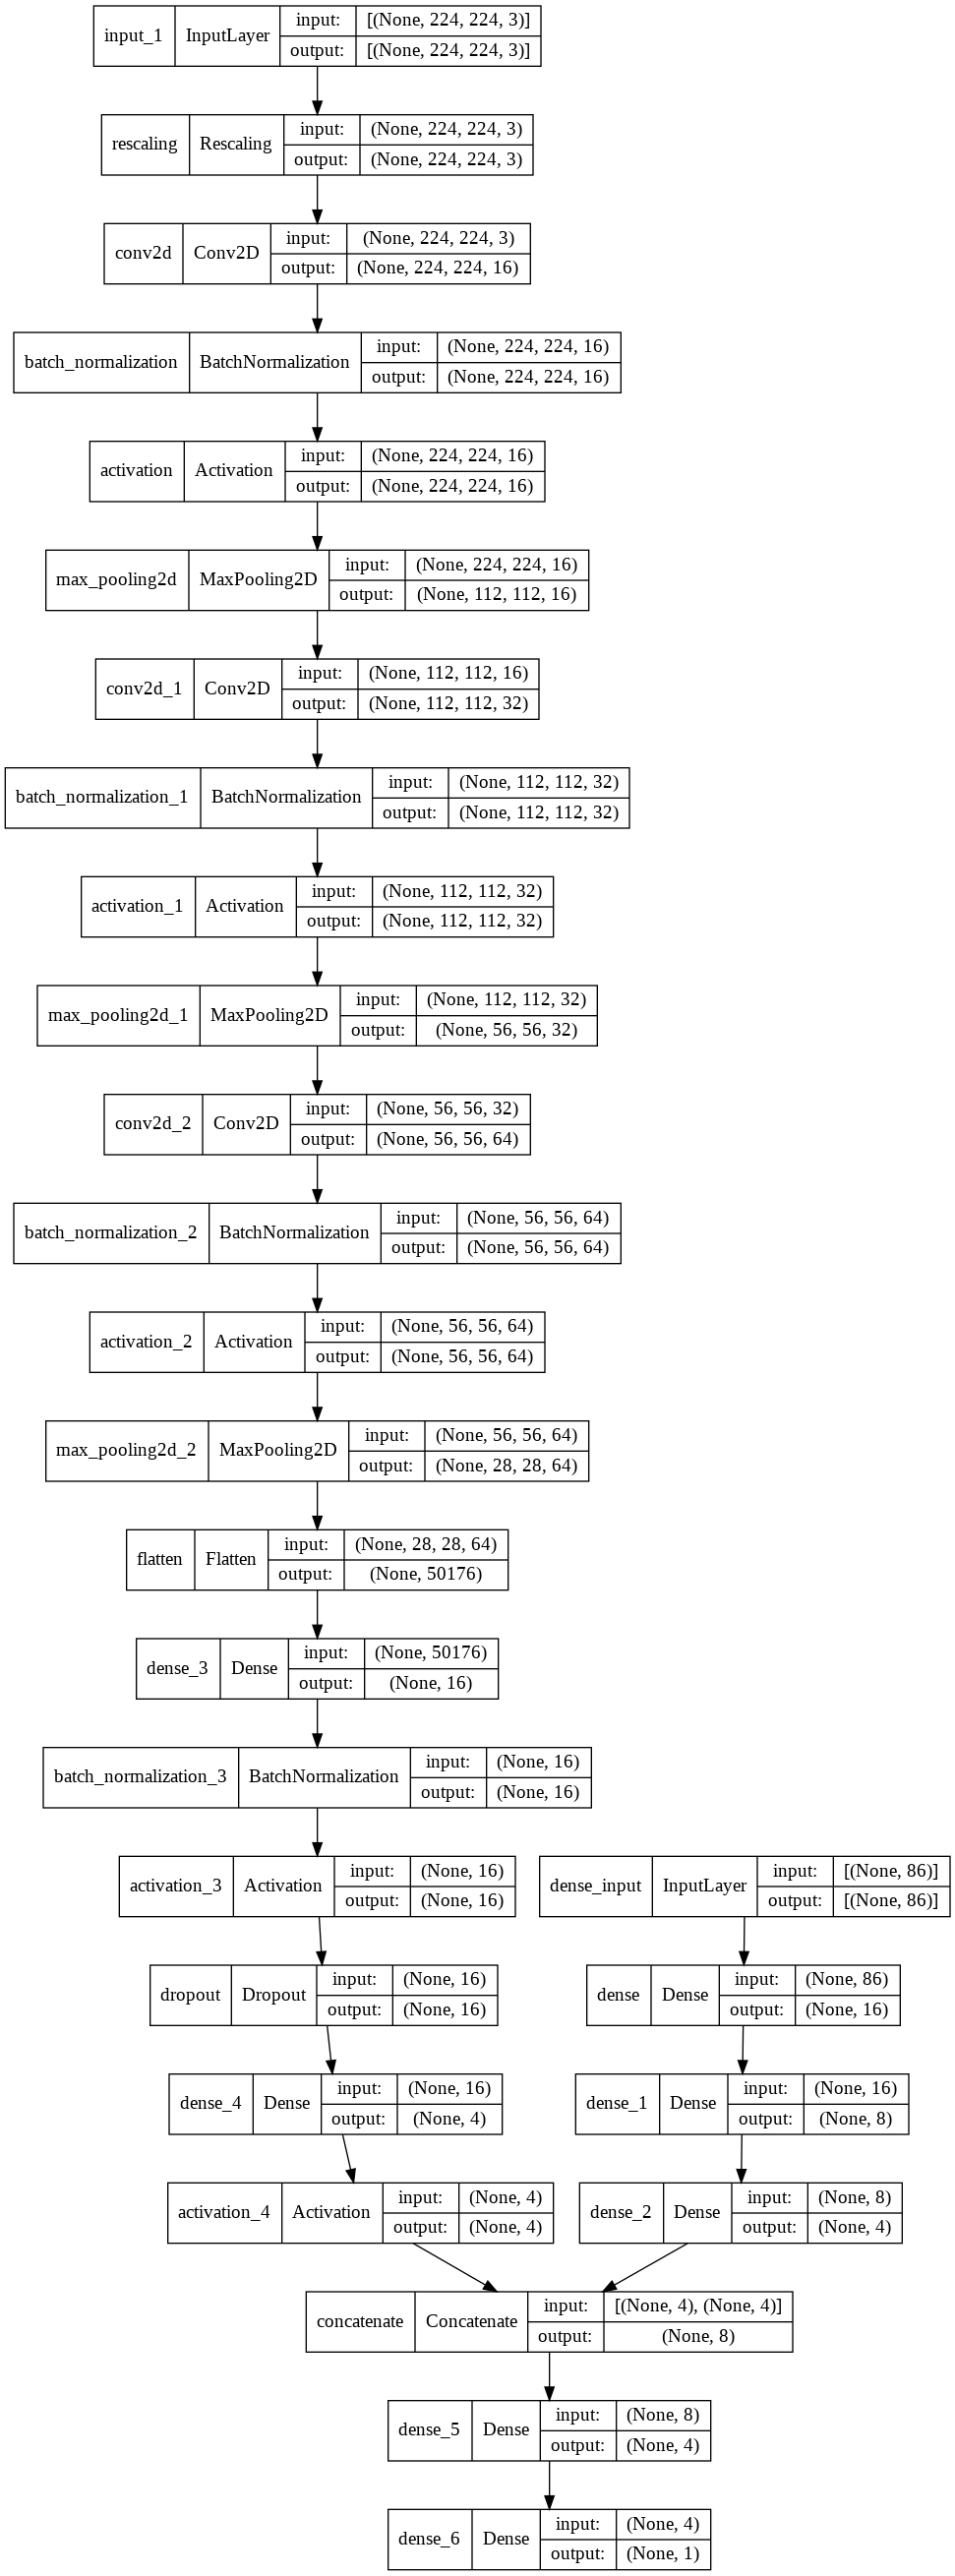

In [54]:
from keras.utils.vis_utils import plot_model
plot_model(model_combined, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**SUMMARY DEL MODELO COMBINADO**

In [55]:
model_combined.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 16  448         ['rescaling[0][0]']              
                                )                                                                 
                                                                                            

**COMPILAMOS EL MODELO**

In [50]:
from tensorflow.keras.optimizers import Adam, SGD
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model_combined.compile(loss="mean_absolute_percentage_error", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**ENTRENAMOS EL MODELO**

In [56]:
# train the model
print("[INFO] training model...")
model_combined.fit(
    x=[trainAttrX, trainImagesX], y=trainY, 
    validation_data=([testAttrX, testImagesX], testY),
    epochs=80, batch_size=20)

[INFO] training model...
Epoch 1/80
262/262 [==============================] - 8s 29ms/step - loss: 24.0717 - val_loss: 25.3528
Epoch 2/80
262/262 [==============================] - 7s 25ms/step - loss: 24.0837 - val_loss: 25.2074
Epoch 3/80
262/262 [==============================] - 7s 25ms/step - loss: 23.8850 - val_loss: 25.1979
Epoch 4/80
262/262 [==============================] - 7s 25ms/step - loss: 23.8924 - val_loss: 25.3433
Epoch 5/80
262/262 [==============================] - 7s 25ms/step - loss: 23.9845 - val_loss: 25.5296
Epoch 6/80
262/262 [==============================] - 7s 25ms/step - loss: 24.0353 - val_loss: 25.0802
Epoch 7/80
262/262 [==============================] - 7s 25ms/step - loss: 23.8644 - val_loss: 25.5829
Epoch 8/80
262/262 [==============================] - 7s 25ms/step - loss: 23.9135 - val_loss: 27.1823
Epoch 9/80
262/262 [==============================] - 7s 26ms/step - loss: 23.9149 - val_loss: 25.3853
Epoch 10/80
262/262 [===========================

In [59]:
model_combined.save("model_Airbnb.h5")

In [58]:
import locale

# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model_combined.predict([testAttrX, testImagesX])

diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(df_Madrid_with_imgs["Price"].mean(), grouping=True),
	locale.currency(df_Madrid_with_imgs["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: $64.22, std house price: $51.25
[INFO] mean: 25.40%, std: 24.69%
